# Business Prop:
Company A is stingy AF and doesn't want to mine their consumerbase for more data. THey want to squeeze every last delicious drop from the feedback they already receive. They have a review system in place that allows consumer to rate a place from one to five stars and leave a written review. As a way of getting more data out of this system they want hteir three star reviews disambiguated. Three star reviews create a problem by being notoriously flimsy in intent. Sometimes 3 stars is good, sometimes its bad, sometimes its just average. In an attempt to demystify these reviews company A would like a tool that will designate a review as positive or negative, no middle ground, no neutrals, no prisoners. 

# Structure: bag of bigrams TF-IDF Text Classification
1. Pre-Pre-Processing
        -import data from Kaggle
        -subset data by star rating
        -combine 1+2 star data frames and 4+5 star data frames
        -read and write pos and neg data frames into text files for use later
        -save three star for testing
        -create list containing all tagged texts
2. EDA
        -get types/tokens/freq/count
        -frequency distribution
        -freq graph
        -hapaxes
3. Data Cleaning
        -case fold
        -strip punctution
        -strip non alpha numeric chars
        -strip stop words
        -lemmatize/stem
        -spelling, levenshtein distance?*
        -strip words less than len = 2*
        -strip words with count < 2
        -strip names from data?*
        - make .py to do all this, make python package?
4. TF-IDF
        -get bigrams?
        -test_train_split
        -vectorize
        -get TF_IDF for each bigram
5. Models
        -model types for possible use:
            MultinomialNB
            BernoulliNi
            LogisticRegression
            SGDClassifier
            linear Regression
            knn
            random forest
            SVC
            LinearSVc
            NuSVC
        -stretch goal:
            grid hyperparameter tweaking
            -pipleine?
6. MAKE THE MEGARITHM
        -calc accuracy of all models
        -drop underperforming models
        -combines models via ensemble for an algorithm of algorithms
        -bagging/stacking/voteregressor
7. pickle that ish
        -create pickle files for each classifer
        -create pickle file for MEGARITHM
8. I hate pinging APIs
        -they suck
        -git ignore?
        -ping yelp API, check canvas lecture from 100 years ago or last month
        -check program on actual hot n fresh yelp data
        -check on train data from 1/2/4/5
        -check on 3 data
        -check on new data
        -profit?
9. just clasify more things?
        -get more but Different data
        -tweets, different kind of reviews, GOP speeches?
        -test classifiers against this to see how well they perform
10. More stretch  goals beause I'm a masochist on the rack
        -make word cloud visualizations
        - run program for specific company
        - use entity recognition to pull out relevant entities to fix?
        - vis total num of tokens after each data cleaning
        - vis total count of types after each data cleaning
11. Notebook beautification
        -table of contents, linked to appropriate headers
        -README.txt
        -pictures???
        -more markdown
        -collect all important files, delete others
        -link github

#  Describe the data

root":{9 items

    "review_id":string"lWC-xP3rd6obsecCYsGZRg"
    
    "user_id":string"ak0TdVmGKo4pwqdJSTLwWw"
    
    "business_id":string"buF9druCkbuXLX526sGELQ"
    
    "stars":int4
    
    "useful":int3
    
    "funny":int1
    
    "cool":int1
    
    "text":string"Apparently Prides Osteria had a ...."
    
    "date":string"2014-10-11 03:34:02"
}


five million yelp reviews

collected from Kaggle

ranked form 1 to 5 stars

reduced size to 10k reviews

only use text and star key/vals

2k 1 star, 3k 2 star, 3k 4 star, 2k 5 star

In [70]:
import nltk
import random
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import json
nltk.download('punkt')
import csv
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.stem import PorterStemmer
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import StackingRegressor

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwardsrk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import sys
print(sys.maxsize)

9223372036854775807


# Pre-Pre-Processing

In [3]:
#raw_data = pd.read_json('yelp_academic_dataset_review.json', lines = True)
#read in json file line by line as pandas data frame

In [4]:
#raw_data.head()
#raw_data.shape
#df = raw_data[['text', 'stars']]
#subset data into working df of only usefull info, text and star rating

In [5]:
#df.isna().sum()
#check for missing values
#none found

text     0
stars    0
dtype: int64

In [6]:
#df.head()
#all_five_star = df[df['stars'] == 5]
#all_four_star = df[df['stars'] == 4]
#all_three_star = df[df['stars'] == 3]
#all_two_star = df[df['stars'] == 2]
#all_one_star = df[df['stars'] == 1]
#subset data further into categories based on star rating

In [8]:
#len(all_five_star), len(all_four_star), len(all_two_star), len(all_one_star), len(all_three_star)
#check length of each text subset

(3586460, 1673404, 635072, 1283897, 842289)

In [9]:
#five_raw_2000 = all_five_star.head(2000)
#four_raw_3000 = all_four_star.head(3000)
#two_raw_3000 =all_two_star.head(3000)
#one_raw_2000 = all_one_star.head(2000)
#get workable sized data sets with bias adjust for one star and five star

In [10]:
#dfs = [four_raw_3000, five_raw_2000]
#pos = pd.concat(dfs)
#concast four and five star for positive tagged set

In [11]:
#pos['stars'].unique()
#check split went well

array([4, 5], dtype=int64)

In [12]:
#dfss = [one_raw_2000, two_raw_3000]
#neg = pd.concat(dfss)
#concat 1 and two str for negative tagged set

In [13]:
#neg['stars'].unique()

array([1, 2], dtype=int64)

In [14]:
#neg['value'] = neg[(neg['stars'] == 1) | (neg['stars'] == 2), neg['value'] = 'neg']
#neg_list = []
#pos_list = []
#for i in range(0,len(neg)):
#    neg_list.append('neg')
#    pos_list.append('pos')
#use a for loop to create a list of lenght equal to 5000, lenght of eahc set of tagged data

In [15]:
#len(neg_list)
#check doc length

5000

In [16]:
#neg['value'] = neg_list
#pos['value'] = pos_list
#add new column to df to represent data tag

In [17]:
#neg.head()

text  stars value
1   I am actually horrified this place is still in...      1   neg
3   Dismal, lukewarm, defrosted-tasting "TexMex" g...      1   neg
15  If I could give less than one star, that would...      1   neg
16  10pm on a super bowl Sunday and they're alread...      1   neg
18  Tried to have my car repaired.  Even made an a...      1   neg

In [18]:
#neg_raw = neg.drop('stars', axis =1)
#pos_raw = pos.drop('stars', axis =1)
#drop stars column as no longer useful 

In [19]:

#neg_raw_list = neg_raw['text'].tolist()
#pos_raw_list = pos_raw['text'].tolist()
#move data out of df and into list

In [21]:
#neg_list_1 = [review.replace('\n', '') for review in neg_raw_list]
#pos_list_1 = [review.replace('\n', '') for review in pos_raw_list]
#get rid of newline chars

In [88]:
["{}\n".format(review) for review in neg_list_1]

['I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn\'t. So the older black male stylist finishes the haircut he was doing and it\'s our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn\'t cut hair, it just rubs against it. How does this man who has an alleged cosme

In [22]:
#with open('neg_raw_list.txt', 'w', encoding="utf-8") as filehandle:
#    filehandle.writelines("{}\n".format(review) for review in neg_list_1)
#open file to write processed data for negs

In [23]:
#with open('pos_raw_list.txt', 'w', encoding="utf-8") as filehandle:
#    filehandle.writelines("{}\n".format(review) for review in pos_list_1)
#open file to write processed data for pos

In [34]:
pos_5k = open("C:/Users/edwardsrk/final_proj/yelp_reviews_tensorflow/pos_raw_list.txt","r", encoding="utf-8").read()
neg_5k = open("C:/Users/edwardsrk/final_proj/yelp_reviews_tensorflow/neg_raw_list.txt","r", encoding="utf-8").read()
#read data in

In [35]:
documents = []

for r in pos_5k.split('\n'):
    documents.append( (r, "pos") )

for r in neg_5k.split('\n'):
    documents.append( (r, "neg") )
    
#split data on the newline and append to doc list with pos or neg tag

In [36]:
len(documents)

10006

In [37]:
all_words_raw = []

pos_5k_words = word_tokenize(pos_5k)
neg_5k_words = word_tokenize(neg_5k)
#tokenize data

In [38]:
for w in pos_5k_words:
    all_words_raw.append(w)
print(len(all_words_raw))
    
for w in neg_5k_words:
    all_words_raw.append(w)
print(len(all_words_raw))

#append tokenized data to all_words_raw

561886
1325865


# EDA

In [9]:
print(len(all_words_raw))
#check length

1325865


In [10]:
tokens = all_words_raw
types = set(tokens)
len(types), len(tokens)

#create token and type vars

(42446, 1325865)

In [11]:
fdist1 = nltk.FreqDist(tokens)
fdist1
#create frequency distribution, checks all tokens and how often they occur in the vocab
#prints out top 10 most used

FreqDist({'.': 65416, 'the': 48343, ',': 38817, 'and': 38066, 'I': 33800, 'to': 28754, 'a': 28243, 'was': 22829, 'of': 16156, 'it': 14386, ...})

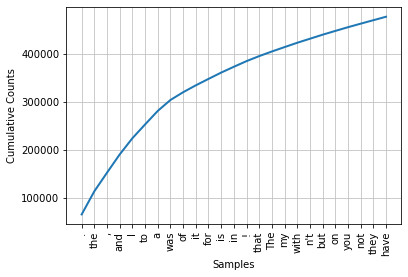

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
fdist1.plot(25, cumulative = True)

In [13]:
fdist1.hapaxes()[:10]
#first ten unique words

['casa',
 'griping',
 'zips',
 'clotted',
 'ReviewI',
 'accommodating.Won',
 'Ton',
 'tons.Chicken',
 'Diced',
 'Cashews']

In [14]:
fdist1['the'], fdist1.freq('the')
#shows count of the word and frequency with which it appears

(48343, 0.03646147986408873)

In [15]:
words_lower = [w.lower() for w in all_words_raw]
#list comprehension for making all words lower case

In [16]:
len(words_lower)

1325865

In [17]:
words_npunc = [w for w in words_lower if w.isalpha()]
len(words_npunc)
# list comp for all words that are alpha numeric, no punctuation

1136133

In [18]:
fdist2 = nltk.FreqDist(words_npunc)
#check freq dist again

In [19]:
fdist2
#punctuation gone

FreqDist({'the': 58078, 'and': 38911, 'i': 34846, 'to': 28970, 'a': 28935, 'was': 23011, 'it': 17467, 'of': 16251, 'for': 13843, 'is': 13304, ...})

In [20]:
#from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#get a list of stop words from nltk

In [21]:
all_words_nstop = [w for w in words_npunc if not w in stop_words]
len(all_words_nstop)
#list comp to remove all stop words

559490

In [22]:
fdist3 = nltk.FreqDist(all_words_nstop)
fdist3
#thrid freqdist to check stopwords are gone

FreqDist({'food': 5776, 'good': 5122, 'place': 4894, 'service': 3848, 'would': 3823, 'like': 3796, 'get': 3592, 'great': 3554, 'time': 3543, 'one': 3519, ...})

In [23]:
bgram_list = list(nltk.bigrams(all_words_nstop))
#create list of bigrams

In [24]:
len(bgram_list)
#check bigram list length

559489

In [70]:
#need to put data back into pandas df? 
#mark as positive negative? 
bgram_list

[('oh', 'happy'),
 ('happy', 'day'),
 ('day', 'finally'),
 ('finally', 'canes'),
 ('canes', 'near'),
 ('near', 'casa'),
 ('casa', 'yes'),
 ('yes', 'others'),
 ('others', 'griping'),
 ('griping', 'drive'),
 ('drive', 'thru'),
 ('thru', 'packed'),
 ('packed', 'like'),
 ('like', 'canes'),
 ('canes', 'area'),
 ('area', 'like'),
 ('like', 'go'),
 ('go', 'sit'),
 ('sit', 'enjoy'),
 ('enjoy', 'chicken'),
 ('chicken', 'cashiers'),
 ('cashiers', 'pleasant'),
 ('pleasant', 'far'),
 ('far', 'food'),
 ('food', 'wise'),
 ('wise', 'yet'),
 ('yet', 'receive'),
 ('receive', 'funky'),
 ('funky', 'chicken'),
 ('chicken', 'clean'),
 ('clean', 'crew'),
 ('crew', 'zips'),
 ('zips', 'around'),
 ('around', 'dining'),
 ('dining', 'area'),
 ('area', 'constantly'),
 ('constantly', 'usually'),
 ('usually', 'well'),
 ('well', 'kept'),
 ('kept', 'gripe'),
 ('gripe', 'one'),
 ('one', 'fella'),
 ('fella', 'red'),
 ('red', 'hair'),
 ('hair', 'makes'),
 ('makes', 'rounds'),
 ('rounds', 'cleaning'),
 ('cleaning', 'smil

# Pandas implementation

In [31]:
#documents

In [39]:
df = pd.DataFrame(documents, columns =['text', 'tag']) 
df.head()
df.shape
#read data into df with text as col1 and tag as col2

(10006, 2)

# Data Cleaning

In [40]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
sw = stopwords.words('english')
def data_cleaner(doc, stop_words=sw):
    #rename to data cleaner
    '''
    
    :param doc: a document from the satire corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    regex_token = RegexpTokenizer(r"([a-zA-Z]+(?:’[a-z]+)?)")
    doc = regex_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
    print(doc)
    lemmatizer = WordNetLemmatizer() 
    return ' '.join([lemmatizer.lemmatize(w) for w in doc])

In [41]:
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer

In [42]:
sw = stopwords.words('english')
#add custom sopt words?
#custom_sw = stopwords.words('english')
#custom_sw.extend(['email', 'subject', 'from'])
c_list = df.text.tolist()


clean_corpus = []
for doc in c_list:
    clean_corpus.append(doc_preparer(doc, sw))

['oh', 'happy', 'day', 'finally', 'canes', 'near', 'casa', 'yes', 'others', 'griping', 'drive', 'thru', 'packed', 'like', 'canes', 'area', 'like', 'go', 'sit', 'enjoy', 'chicken', 'cashiers', 'pleasant', 'far', 'food', 'wise', 'yet', 'receive', 'funky', 'chicken', 'clean', 'crew', 'zips', 'around', 'dining', 'area', 'constantly', 'usually', 'well', 'kept', 'gripe', 'one', 'fella', 'red', 'hair', 'makes', 'rounds', 'cleaning', 'smile', 'personality', 'nights', 'ago', 'tossed', 'napkins', 'put', 'table', 'help', 'go', 'meal', 'done', 'reached', 'tray', 'excuse', 'done', 'realize', 'trying', 'job', 'quickly', 'little', 'table', 'manners', 'goes', 'along', 'way', 'said', 'still', 'like', 'grub', 'glad', 'finally', 'cane', 'close']
['twice', 'nice', 'laid', 'back', 'tried', 'weekend', 'southern', 'menu', 'delicious', 'collard', 'greens', 'mac', 'cheese', 'ribs', 'bbq', 'chicken', 'sandwich', 'scone', 'clotted', 'cream', 'divine', 'iced', 'teas', 'refreshing', 'swear', 'drank', 'whole', 'con

['excellent', 'service', 'concern', 'products', 'purchased', 'manager', 'took', 'ownership', 'helped', 'get', 'everything', 'straightened', 'friendly', 'staff']
['first', 'trip', 'restaurant', 'went', 'breakfast', 'must', 'say', 'pleased', 'portions', 'huge', 'food', 'really', 'good', 'got', 'banana', 'pecan', 'caramel', 'pancakes', 'got', 'mexican', 'style', 'eggs', 'benedict', 'amazing', 'tell', 'felt', 'waiter', 'kind', 'snooty', 'us', 'however', 'would', 'stop', 'going', 'back', 'believe', 'giving', 'everybody', 'benefit', 'doubt', 'future', 'continues', 'attitude', 'ask', 'different', 'waitress', 'definitely', 'let', 'snooty', 'waiter', 'keep', 'enjoying', 'amazing', 'food', 'remodel', 'yesterday', 'interesting', 'see', 'restaurant', 'looks', 'like', 'remodel', 'done']
['went', 'brunch', 'friends', 'extremely', 'positive', 'experience', 'servers', 'seemed', 'tired', 'continually', 'refilled', 'cups', 'water', 'chips', 'salsa', 'breakfast', 'tacos', 'large', 'enough', 'fill', 'got'

['pretty', 'good', 'boba', 'favorite', 'tea', 'tasty', 'made', 'specifically', 'asked', 'like', 'milk', 'teas', 'best', 'friend', 'slushy', 'version', 'said', 'pretty', 'good', 'staff', 'fast', 'atmosphere', 'place', 'clean', 'lively', 'nice', 'place']
['huge', 'omelet', 'split', 'niece', 'breakfast', 'ordered', 'sides', 'turkey', 'bacon', 'yummy', 'service', 'spectacular']
['ill', 'honest', 'expect', 'much', 'place', 'surprisingly', 'good', 'deepfried', 'artichokes', 'fun', 'presentation', 'ribs', 'mac', 'n', 'cheese', 'done', 'nicely', 'mussels', 'good', 'service', 'greatoverall', 'nice', 'lil', 'spot']
['new', 'friend', 'colin', 'fukunaga', 'fukuburgerlv', 'recommended', 'honey', 'pig', 'las', 'vegas', 'must', 'go', 'restaurant', 'vegas', 'disappoint', 'people', 'never', 'leave', 'strip', 'missing', 'real', 'gems', 'city', 'ordered', 'eat', 'lunch', 'special', 'korean', 'bbq', 'fixings', 'let', 'say', 'friend', 'rolled', 'wish', 'great', 'food', 'like', 'back', 'home']
['food', 'goo

['driven', 'often', 'always', 'crowded', 'street', 'appeal', 'good', 'however', 'decided', 'many', 'people', 'inside', 'something', 'going', 'breakfast', 'huevos', 'rancheros', 'amazing', 'coffee', 'excellent', 'finally', 'place', 'knows', 'make', 'coffee', 'carrot', 'cake', 'delish', 'much', 'several', 'times', 'always', 'cozy', 'funky', 'place', 'go', 'eat', 'great', 'find', 'bowness']
['good', 'reminder', 'live', 'wild', 'wild', 'west', 'see', 'families', 'riding', 'bikes', 'friends', 'good', 'walk', 'athletes', 'training', 'marathons', 'pretending', 'love', 'marathons', 'lovely', 'bridle', 'path', 'know', 'bridal', 'path', 'get', 'horseshoe', 'dirt', 'path', 'yep', 'serious', 'middle', 'phoenix', 'love', 'bridle', 'path', 'favorite', 'place', 'get', 'good', 'jog', 'good', 'bit', 'people', 'watching', 'time', 'stay', 'city', 'hike', 'usually', 'run', 'takes', 'little', 'bit', 'olden', 'days', 'right', 'city', 'path', 'pretty', 'frequented', 'weekend', 'mornings', 'especially', 'satu

['cute', 'froyo', 'shop', 'near', 'home', 'favorites', 'coconut', 'pineapple', 'super', 'excited', 'saw', 'taro', 'disappointed', 'got', 'taste', 'tart', 'personally', 'think', 'taro', 'tart', 'anyway', 'pineapple', 'amazing', 'stick', 'lots', 'unique', 'toppings', 'including', 'different', 'flavored', 'bobas', 'really', 'bobas', 'like', 'round', 'balls', 'shaped', 'like', 'boba', 'burst', 'juice', 'pop', 'usually', 'steer', 'clear', 'goes', 'straight', 'mochi', 'also', 'offer', 'usual', 'fresh', 'fruit', 'candies', 'chocolates', 'cereals', 'nuts', 'etc', 'price', 'comparable', 'self', 'serve', 'yogurt', 'shops']
['great', 'place', 'hang', 'meet', 'people', 'seriously', 'non', 'drinkers', 'teenagers', 'mormon', 'singles', 'go', 'everyone', 'else', 'bar']
['dad', 'walked', 'downtown', 'pittsburgh', 'heard', 'deluca', 'best', 'breakfast', 'pittsburgh', 'got', 'line', 'door', 'minutes', 'got', 'table', 'small', 'little', 'diner', 'food', 'good', 'got', 'french', 'toast', 'bacon', 'dad', '

['beautiful', 'restaurant', 'awesome', 'service', 'good', 'expensive', 'portion', 'sizes', 'food', 'decor', 'reminds', 'cozier', 'cento', 'love', 'booths', 'remind', 'little', 'cabanas', 'love', 'see', 'cooking', 'fun', 'friendly', 'helpful', 'servers', 'menu', 'reminds', 'menu', 'pig', 'fur', 'coat', 'mostly', 'smaller', 'plates', 'designed', 'sharing', 'however', 'practice', 'dishes', 'graft', 'actually', 'shareable', 'think', 'main', 'difference', 'actual', 'food', 'graft', 'piafc', 'graft', 'food', 'quite', 'decadent', 'actually', 'want', 'bite', 'however', 'group', 'shared', 'lot', 'dishes', 'really', 'got', 'tiny', 'bite', 'left', 'hungry', 'still', 'paid', 'lot', 'dish', 'like', 'per', 'bite', 'loved', 'food', 'though', 'think', 'would', 'go', 'back', 'one', 'person', 'prepared', 'spend', 'lot', 'favorites', 'include', 'beef', 'tartare', 'flank', 'steak', 'ravioli', 'macaroni', 'cheese', 'thing', 'like', 'smoky', 'people', 'apparently', 'love', 'fried', 'ch', 'vre', 'good', 'int

['perk', 'great', 'food', 'really', 'good', 'comes', 'fast', 'staff', 'friendliest', 'around', 'einstein', 'bagel', 'doors', 'go', 'honestly', 'wish', 'people', 'community', 'supported', 'locally', 'owned', 'places', 'like', 'instead', 'chains', 'money', 'stays', 'right', 'community', 'instead', 'shipped', 'state', 'god', 'knows', 'state', 'needs', 'jobs', 'money', 'highly', 'recommend', 'restaurant']
['wow', 'place', 'super', 'nice', 'fancy', 'lot', 'people', 'stay', 'work', 'everything', 'feels', 'new', 'modern', 'clean', 'elegant', 'interior', 'design', 'workers', 'friendly', 'always', 'tend', 'needs', 'furniture', 'decorations', 'minimalist', 'feel', 'probably', 'drawn', 'hotel', 'breakfast', 'pretty', 'good', 'wished', 'got', 'bigger', 'cups', 'plates', 'deal', 'breaker', 'though', 'room', 'stayed', 'spacious', 'big', 'full', 'size', 'beds', 'couch', 'desk', 'big', 'bathroom', 'rooms', 'also', 'minimalist', 'fee', 'beds', 'comfy', 'lay', 'sink', 'slept', 'well', 'desk', 'kind', 's

['taco', 'simply', 'mouth', 'watering', 'usually', 'stick', 'basics', 'get', 'carne', 'asada', 'lady', 'talked', 'trying', 'tacos', 'size', 'silver', 'dollar', 'maybe', 'little', 'bigger', 'nonetheless', 'ended', 'trying', 'fish', 'taco', 'shrimp', 'taco', 'carnitas', 'well', 'carne', 'let', 'tell', 'flavor', 'powerful', 'onions', 'cilantro', 'fresh', 'salsa', 'enough', 'heat', 'seal', 'deal', 'bring', 'flavor', 'together', 'place', 'one', 'top', 'five', 'get', 'tacos']
['got', 'flight', 'beers', 'really', 'liked', 'less', 'liked', 'one', 'success', 'favorite', 'definitely', 'pumpkin', 'much', 'pumpkin', 'flavor', 'spice', 'service', 'quick', 'nice']
['favourite', 'local', 'breakfast', 'place', 'portions', 'huge', 'food', 'fancy', 'good', 'great', 'family', 'usually', 'full', 'weekend', 'mornings', 'never', 'waited', 'long']
['year', 'since', 'moved', 'charlotte', 'favorite', 'asian', 'restaurant', 'beef', 'rendang', 'exploded', 'flavors', 'mouth', 'wow']
['rami', 'absolutely', 'gorgeo

['holy', 'cow', 'man', 'gave', 'f', 'k', 'hair', 'thought', 'eric', 'spun', 'around', 'mirror', 'today', 'styling', 'hair', 'know', 'start', 'writing', 'yelp', 'review', 'soon', 'enter', 'place', 'saw', 'thoughts', 'left', 'except', 'christ', 'look', 'good', 'would', 'dismissive', 'give', 'gwe', 'stars', 'based', 'premise', 'organic', 'hair', 'care', 'styling', 'might', 'done', 'anyway', 'really', 'truly', 'believe', 'everyone', 'needs', 'read', 'ingredient', 'labels', 'products', 'use', 'hair', 'face', 'body', 'really', 'think', 'dubious', 'chemistry', 'seeping', 'bodies', 'every', 'day', 'green', 'envy', 'girl', 'rest', 'stay', 'valley', 'business', 'philosophy', 'ethical', 'whole', 'hearted', 'excellent', 'stylists', 'today', 'saw', 'eric', 'flotta', 'nice', 'enough', 'take', 'soon', 'came', 'even', 'though', 'half', 'hour', 'early', 'scream', 'horror', 'post', 'workout', 'hair', 'led', 'sink', 'start', 'wash', 'style', 'blowdry', 'told', 'organic', 'products', 'salon', 'uses', 'car

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['rated', 'low', 'based', 'price', 'tag', 'much', 'better', 'overall', 'experiences', 'less', 'half', 'price', 'food', 'terrible', 'long', 'like', 'pairing', 'wine', 'dinner', 'tried', 'wine', 'waitress', 'suggested', 'literally', 'never', 'tasted', 'wine', 'due', 'completely', 'scorched', 'taste', 'buds', 'filet', 'roasts', 'mouth', 'expected', 'taste', 'top', 'quality', 'piece', 'beef', 'nicely', 'complemented', 'wine', 'instead', 'tasted', 'hot', 'pepper', 'wine', 'sure', 'red', 'chance', 'coming', 'mouth', 'blown', 'pepper', 'weird', 'thing', 'like', 'spicy', 'food', 'go', 'steak', 'hype', 'price', 'tag', 'apparently', 'mr', 'flay', 'checked', 'chef', 'lately']
['honestly', 'best', 'food', 'court', 'quality', 'ordered', 'delivery', 'nice', 'staff', 'quick', 'six', 'us', 'disappointed', 'must', 'changed', 'ownership', 'since', 'visited', 'last', 'many', 'better', 'choose', 'sorry', 'negative', 'hot', 'sour', 'soup', 'good', 'b']
['ambience', 'great', 'location', 'decor', 'point', '

['knocked', 'star', 'last', 'time', 'went', 'fish', 'fresh', 'eat', 'served', 'salmon', 'roe', 'horrible', 'like', 'taste', 'food', 'sushi', 'place', 'serve', 'freshest', 'food', 'huge', 'problem', 'eat', 'lot', 'sushi', 'right', 'ranking', 'place', 'bottom', 'sorry', 'soup', 'months']
['food', 'excellent', 'location', 'terrific', 'however', 'waitstaff', 'management', 'duty', 'night', 'ate', 'either', 'indifferent', 'inexperienced', 'party', 'eight', 'ordered', 'appetizers', 'expensive', 'meals', 'numerous', 'bottles', 'wine', 'drinks', 'waitress', 'difficulty', 'opening', 'wine', 'bottles', 'corkscrew', 'obviously', 'done', 'often', 'tried', 'hard', 'worked', 'food', 'came', 'haphazardly', 'big', 'waits', 'us', 'others', 'gotten', 'meals', 'dinner', 'wanted', 'sit', 'outside', 'dinner', 'drink', 'staff', 'removed', 'cushions', 'telling', 'us', 'rain', 'predicted', 'sure', 'forecast', 'looking', 'suspect', 'people', 'wanted', 'get', 'early', 'way', 'rain', 'two', 'days', 'also', 'made'

In [43]:
df['clean'] = clean_corpus
df = df.drop(['text'], axis= 1)
df.head()

tag                                              clean
0  pos  oh happy day finally cane near casa yes others...
1  pos  twice nice laid back tried weekend southern me...
2  pos  order delivery reviewi discovered place front ...
3  pos  close friend town instead taking well establis...
4  pos  coconut fish cafe fantastic five star fish caf...

# Viz of data change over cleaning

In [44]:
def token_type_length(df, df_col):
    """takes in a df and a column name. Turns the column into list, calls 
    helper function to flatten the list into tokens. calculates the number of tokesn, number of types 
    and the length of tokesn and the length of types"""
    review_list = df[df_col].tolist()
    #turns each column into a list tokenized words
    tokens = token_df_to_list(review_list)
    #variable to contain every token in every review
    types = set(tokens)
    #variable contains the set of types in every list of token
    type_len = len(types)
    token_len = len(tokens)
    return(tokens, types, type_len, token_len)
#token_type_length(df, 'text_low')

In [45]:
col_list_full = df.columns
#list containing each column name
col_list = col_list_full[2:]
#shorten list to just contain names with cleaned text
col_list
token_type_length_list = []
for cname in col_list:
    #loops through each name in list
    token_type_length_list.append(token_type_length(df, cname))
    #appends fucntion return values to list


In [49]:
types_list = []
tokens_list = []
for i in token_type_length_list:
    tokens_list.append(i[3])    
    types_list.append(i[2])
    #get just the number of tokens nadnumber of types
    
#get token and types for every cleaning iteration
#separate numbers into respective lists

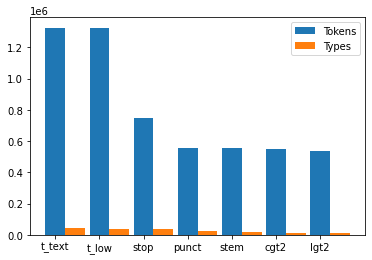

In [50]:
labels = ['t_text', 't_low', 'stop', 'punct', 'stem', 'cgt2', 'lgt2']
bw = .45

b1 = np.arange(len(labels))
b2 = [x + bw for x in b1]

fig, ax = plt.subplots()
ax.bar(b1,tokens_list, width = bw, label = 'Tokens')
ax.bar(b2, types_list, width = bw, label = 'Types')

ax.set_y_label = ('Amounts')
ax.set_title = ('Change in amount of tokens and types during cleaning')
ax.set_xticks(b1)
ax.set_xticklabels(labels)
ax.legend()
#make paired bar plot graph to show drop in amount

In [51]:
df.head()

text  tag  \
0  Oh happy day, finally have a Canes near my cas...  pos   
1  I have been here twice. Very nice and laid bac...  pos   
2  ORDER In (Delivery) ReviewI discovered this pl...  pos   
3  A close friend was in town and so instead of t...  pos   
4  Coconut's Fish Cafe is a fantastic, Five Stars...  pos   

                                      tokenized_text  \
0  [Oh, happy, day, ,, finally, have, a, Canes, n...   
1  [I, have, been, here, twice, ., Very, nice, an...   
2  [ORDER, In, (, Delivery, ), ReviewI, discovere...   
3  [A, close, friend, was, in, town, and, so, ins...   
4  [Coconut, 's, Fish, Cafe, is, a, fantastic, ,,...   

                                            text_low  \
0  [oh, happy, day, ,, finally, have, a, canes, n...   
1  [i, have, been, here, twice, ., very, nice, an...   
2  [order, in, (, delivery, ), reviewi, discovere...   
3  [a, close, friend, was, in, town, and, so, ins...   
4  [coconut, 's, fish, cafe, is, a, fantastic, ,,...   

                                             no_stop  \
0  [oh, happy, day, ,, finally, canes, near, casa...   
1  [twice, ., nice, laid, back, ., tried, weekend...   
2  [order, (, delivery, ), reviewi, discovered, p...   
3  [close, friend, town, instead, taking, well, e...   
4  [coconut, 's, fish, cafe, fantastic, ,, five, ...   

                                             no_punc  \
0  [oh, happy, day, finally, canes, near, casa, y...   
1  [twice, nice, laid, back, tried, weekend, sout...   
2  [order, delivery, reviewi, discovered, place, ...   
3  [close, friend, town, instead, taking, well, e...   
4  [coconut, fish, cafe, fantastic, five, stars, ...   

                                             stemmed  \
0  [oh, happi, day, final, cane, near, casa, ye, ...   
1  [twice, nice, laid, back, tri, weekend, southe...   
2  [order, deliveri, reviewi, discov, place, fron...   
3  [close, friend, town, instead, take, well, est...   
4  [coconut, fish, cafe, fantast, five, star, fis...   

                                               cgt_2  \
0  [oh, happi, day, final, cane, near, casa, ye, ...   
1  [twice, nice, laid, back, tri, weekend, southe...   
2  [order, deliveri, discov, place, front, desk, ...   
3  [close, friend, town, instead, take, well, est...   
4  [coconut, fish, cafe, fantast, five, star, fis...   

                                               lgt_2  
0  [happi, day, final, cane, near, casa, other, g...  
1  [twice, nice, laid, back, tri, weekend, southe...  
2  [order, deliveri, discov, place, front, desk, ...  
3  [close, friend, town, instead, take, well, est...  
4  [coconut, fish, cafe, fantast, five, star, fis...

# TF-IDF

In [46]:
df.head()

tag                                              clean
0  pos  oh happy day finally cane near casa yes others...
1  pos  twice nice laid back tried weekend southern me...
2  pos  order delivery reviewi discovered place front ...
3  pos  close friend town instead taking well establis...
4  pos  coconut fish cafe fantastic five star fish caf...

In [47]:
data = df['clean']
target = df['tag']
#separate features from target

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    random_state=42,
                                                    test_size=0.25)

In [50]:
# Secondary train-test split to build our best model
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          test_size=0.25, random_state=42)

In [51]:
vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range=(1,2))
#calculate the TF-IDF score for unigrams and bigrams in text

X_t_vec = vectorizer.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(vectorizer.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)

In [53]:
# We then transform the validation set. (Do not refit the vectorizer!)

X_val_vec = vectorizer.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(vectorizer.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [52]:
X_t_vec

aa  aa oh  aa staff  aa would       aaa  aaa action  aaa assigns  \
2327  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
1883  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
5006  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
6703  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
7080  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
...   ...    ...       ...       ...       ...         ...          ...   
5995  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
4558  0.0    0.0       0.0       0.0  0.094831         0.0          0.0   
9955  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
1242  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   
9208  0.0    0.0       0.0       0.0  0.000000         0.0          0.0   

      aaa car  aaa including  aaa insurance  ...  zupas today  zuppa  \
2327      0.0            0.0       0.000000  ...          0.0    0.0   
1883      0.0            0.0       0.000000  ...          0.0    0.0   
5006      0.0            0.0       0.000000  ...          0.0    0.0   
6703      0.0            0.0       0.000000  ...          0.0    0.0   
7080      0.0            0.0       0.000000  ...          0.0    0.0   
...       ...            ...            ...  ...          ...    ...   
5995      0.0            0.0       0.000000  ...          0.0    0.0   
4558      0.0            0.0       0.110281  ...          0.0    0.0   
9955      0.0            0.0       0.000000  ...          0.0    0.0   
1242      0.0            0.0       0.000000  ...          0.0    0.0   
9208      0.0            0.0       0.000000  ...          0.0    0.0   

      zuppa deli  zur  zur verf  zuzu  zuzu ideally  zwick  zwick district  \
2327         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
1883         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
5006         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
6703         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
7080         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
...          ...  ...       ...   ...           ...    ...             ...   
5995         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
4558         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
9955         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
1242         0.0  0.0       0.0   0.0           0.0    0.0             0.0   
9208         0.0  0.0       0.0   0.0           0.0    0.0             0.0   

      zwick read  
2327         0.0  
1883         0.0  
5006         0.0  
6703         0.0  
7080         0.0  
...          ...  
5995         0.0  
4558         0.0  
9955         0.0  
1242         0.0  
9208         0.0  

[5628 rows x 234649 columns]

In [54]:
mnb = MultinomialNB()

mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [55]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.8646055437100213

In [57]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [58]:
confusion_matrix(y_val, y_hat)

array([[891,  58],
       [196, 731]], dtype=int64)

In [60]:
#precision_score(y_val, y_hat
#also do this with count vectorizor
#cv = CountVectorizer()
#X_t_vec = cv.fit_transform(X_t)
#X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
#X_t_vec.columns = sorted(cv.vocabulary_)
#X_t_vec.set_index(y_t.index, inplace=True)


#X_val_vec = cv.transform(X_val)
#X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
#X_val_vec.columns = sorted(cv.vocabulary_)
#X_val_vec.set_index(y_val.index, inplace=True)

# Modeling data

In [61]:
%%time
# get accuracy of each model and compare, drop worst model/s for odd number of models
# rank models for wieght
# use enseble method for to create THe MEGARITHM


mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)
mnb_pred = mnb.predict(X_val_vec)
mnb_acc = accuracy_score(y_val, mnb_pred)
mnb_acc



Wall time: 11 s


0.8646055437100213

In [62]:
%%time

bnb = BernoulliNB()
bnb.fit(X_t_vec, y_t)
bnb_pred = bnb.predict(X_val_vec)
#bnb.score(X_train, y_train), bnb.score(X_test, y_test)
bnb_acc = accuracy_score(y_val, bnb_pred)
bnb_acc

Wall time: 10.2 s


0.7414712153518124

In [63]:
%%time

lr = LogisticRegression()
lr.fit(X_t_vec, y_t)
lr_pred = lr.predict(X_val_vec)
#lr.score(X_train, y_train), lr.score(X_test, y_test)
lr_acc = accuracy_score(y_val, lr_pred)
lr_acc

Wall time: 11.4 s


0.8811300639658849

In [64]:
%%time

sgd = SGDClassifier()
sgd.fit(X_t_vec, y_t)
sgd_pred = sgd.predict(X_val_vec)
#sgd.score(X_train, y_train), sgd.score(X_test, y_test)
sgd_acc = accuracy_score(y_val, sgd_pred)
sgd_acc

Wall time: 10.6 s


0.9067164179104478

# Grid Search

In [66]:
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [67]:
lr = LogisticRegression()
mnb = MultinomialNB()
bnb = BernoulliNB()
knn =  KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
xgb = XGBClassifier()
sgd = SGDClassifier()

#lr_pipe = Pipeline(steps =[,('lr', LogisticRegression())])
#mnb_pipe = Pipeline(steps =[,('mnb', MultinomialNB())])
#bnb_pipe = Pipeline(steps =[,('bnb', BernoulliNB())])
#knn_pipe = Pipeline(steps =[,('knn', KNeighborsClassifier())])
#dtc_pipe = Pipeline(steps =[,('dtc', DecisionTreeClassifier())])
#rfc_pipe = Pipeline(steps =[,('rfc', RandomForestClassifier())])
#xgb_pipe = Pipeline(steps =[,('xgb', XGBClassifier())])
#sgd_pipe = Pipeline(steps =[,('sgd', SGDClassifier())])

In [82]:
##Logistic Regression Hyperparameters
lr_params = {
   'C':[.1, .75],
   'max_iter':[500],
   'solver':['lbfgs', 'liblinear']
    
            }

##Multinomial Naive Bayes
mnb_params = {    
    'alpha': [1, .5, .1],
    'fit_prior': ['True', 'False']
}

##Bernoulli Naive Bayes Hyperparameters
bnb_params = {'alpha': list(np.linspace(.1, 1, 10))}

##K Nearest Neighbors
knn_params = {
    'n_neighbors': [3, 7, 12], 
    'weights':['uniform', 'distance'], 
    'p':[1, 2, 3, 4]
             }

##Decision Tree
dtc_params = {
    'criterion':['gini', 'entropy'],  
    'max_depth': [10, 25, 40, 55],
    'min_samples_leaf':[1, 2, 3], 
    'max_features': ['auto', 'sqrt']
              } 

##Random Forest
rfc_params = {
    'n_estimators':[100, 125],
    'criterion':['gini', 'entropy'],
    'max_depth':[20, 40, None],
    'min_samples_leaf':[1, 2, 3], 
    'max_features': ['auto','sqrt', 'log2']
                }

##XGBoost
xgb_params = {
        'eta':[.7, .9, 1.1],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'olsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100, 120]
            }

##SGD Params
sgd_params ={
    'loss': ['hinge', 'log', 'modified_huber', 'perceptron', 'huber', 'squared_loss'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],    
}

In [77]:
log_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = lr_params, scoring = 'accuracy')
log_grid.fit(X_t_vec, y_t)
log_grid.best_params_

{'C': 0.75, 'max_iter': 500, 'solver': 'lbfgs'}

In [83]:
mnb_grid = GridSearchCV(estimator = mnb, param_grid = mnb_params, scoring = 'accuracy')
mnb_grid.fit(X_t_vec, y_t)
mnb_grid.best_params_

KeyboardInterrupt: 

In [ ]:
bnb_grid = GridSearchCV(estimator = bnb, param_grid = bnb_params, scoring = 'accuracy')
bnb_grid.fit(X_t_vec, y_t)
bnb_grid.best_params_

In [ ]:
knn_grid = GridSearchCV(estimator = knn, param_grid = knn_params, scoring = 'accuracy')
knn_grid.fit(X_t_vec, y_t)
knn_grid.best_params_

In [ ]:
dtc_grid = GridSearchCV(estimator = dtc, param_grid = dtc_params, scoring = 'accuracy')
dtc_grid.fit(X_t_vec, y_t)
dtc_grid.best_params_

In [ ]:
rfc_grid = GridSearchCV(estimator = rfc, param_grid = rfc_params, scoring = 'accuracy')
rfc_grid.fit(X_t_vec, y_t)
rfc_grid.best_params_

In [ ]:
xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_params, scoring = 'accuracy')
xgb_grid.fit(X_t_vec, y_t)
xgb_grid.best_params_

In [ ]:
sgd_grid = GridSearchCV(estimator = sgd, param_grid = sgd_params, scoring = 'accuracy')
sgd_grid.fit(X_t_vec, y_t)
sgd_grid.best_params_